# Below are all packages that we need to perform this Data Analysis

In [1]:
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from cltk.corpus.utils.importer import CorpusImporter
from textblob import TextBlob
import re
import itertools
import collections
from cltk.stop.classical_hindi.stops import STOPS_LIST
from cltk.corpus.swadesh import Swadesh
from matplotlib.font_manager import FontProperties
from cltk.tokenize.sentence import TokenizeSentence

def detector(x):
    try:
       return detect(x)
    except:
        None 
        
pd.set_option('display.max_colwidth', -1)
analyzer = SentimentIntensityAnalyzer()

## Not running below code again because it took more than 12 hours for data filtering

# Data Filtering

In [2]:
jsonDF = pd.read_json('Original_election_tweets_gzip.json', orient='records', compression='gzip')

# Selecting columns that are essential for our analysis
col = ['likes','replies','retweets','text','timestamp','user']
selectDF = jsonDF[col]

#removed duplicates because of sponsored tweets? 
selectDF.drop_duplicates(subset = 'text',inplace = True)

#filter for english and hindi tweets only
selectDF['lang'] = selectDF['text'].apply(lambda x:detector(x))
selectDF = selectDF[selectDF['lang'].isin(['en','hi'])]

selectDF.to_json('filtered_election_tweets.json', orient='records')
selectDF.to_json('filtered_election_tweets_gzip.json', orient='records', compression='gzip')

print(selectDF.shape)

/Users/neerajsomani/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/neerajsomani/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


(805911, 7)


## Not Running below code again because it took more than 24 hour to finish data cleaning

# Data Cleaning

In [3]:
# This block in for cleaning Data Set
selectDF.loc[:,'text'] = selectDF.loc[:,'text'].str.lower() # to convert to all lowercase

# below code is to remove unwanted tweets from data frame
unwanted_tweets = '#washingtondc|donald trump|trump|#2020census|american|russia|america|usa|united states|#shirleychisholm|philadelphia|#socialsecurity|@nancypelosi|logan airport|#democrats|democrats|#republicans|republicans|#greennewdeal|#dc' 
cleanDF = selectDF[~selectDF.loc[:,'text'].str.contains(unwanted_tweets, regex=True, flags=re.M)]
# these user (AllergicToCNN, Jehangheer, trishawendorf) posted for american congress

cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: re.sub('pic.twitter.com/\w{10}', '', x)) # this is to replace any url related to pic
cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','', x)) # to remove all urls from text
cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: re.sub('//youtu.be/\w{11}', '', x)) # this is to delete any Youtube related links

# below code is to remove multiple spaces with single space
cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: re.sub('\s+', ' ', x))

# below code is to remove all english stop words
stop = stopwords.words('english')
cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

# Didn't apply tokenization because I don't want to loose hashkey values
# Below code is to apply tokenization using textblob package
#temp.loc[:,'text'] = temp.loc[:,'text'].apply(lambda x: " ".join(TextBlob(x).words))

# below code will be used to perform Lemmatizer
from nltk import WordNetLemmatizer
cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))

cleanDF.to_json('cleaned_election_tweets.json', orient='records')
cleanDF.to_json('cleaned_election_tweets_gzip.json', orient='records', compression='gzip')

cleanDF


/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,likes,replies,retweets,text,timestamp,user,lang
0,5,1,3,"कमलनाथ सरकार ने तोड़ी 14 साल पुरानी परंपरा, 1 जनवरी को नहीं हुआ वंदे मातरम का गायन #kamalnath #madhyapradesh #congress #vandematram-pradesh/vade-mataram-not-sing-in-madhya-pradesh-secretariat …",2019-01-01 23:58:04,AmarUjalaNews,hi
3,0,0,0,ricky martin husband welcome baby girl #aap,2019-01-01 23:51:04,StarMackay,en
4,2,0,2,लोकसभा चुनाव से पहले संगठन मजबूत करने को कांग्रेस छह राज्यों में बनाएगी नए अध्यक्ष #loksabhaelection2019 #congress #rahulgandhi-news/congress-will-make-new-presidents-in-six-states-before-lok-sabha-election-2019 …,2019-01-01 23:49:05,AmarUjalaNews,hi
8,0,0,1,#aap aam admi mock aadmi party #loksabhaelection2019 #delhi?v=d6lhf3wz0-g …,2019-01-01 23:38:26,naashonomics,en
9,0,0,0,festivalgoers still risking life high #aap,2019-01-01 23:38:05,star1027cairns,en
11,1,0,0,second continental congress : met back philadelphia discussed future plan congress began acting like government #standup4humanrights #plans #congress #war??,2019-01-01 23:36:25,RevolutionBoii,en
12,1,0,0,nationwide 72 lakh cr #farmloanwaiver anvail #primeminister #narendramodi #loksabhaelection2019 #modivsmahagathbandhan?v=yd9ckrze7qc …,2019-01-01 23:36:18,naashonomics,en
13,0,0,0,#shirleychisholm #congress,2019-01-01 23:34:18,deathbyhibachi,en
14,0,1,0,#shirleychisholm #congress,2019-01-01 23:33:50,deathbyhibachi,en
15,0,0,0,piss i've paying #socialsecurity 3 decade & get benefit retire due 2 government totally mismanaging program funds. #medicare hospital coverage slashed 2026 too. #buckleup #genx'ers we're screwed. #congress,2019-01-01 23:32:18,NextResort,en


# Data Analysis

In [2]:
cleanDF = pd.read_json('cleaned_election_tweets.json')
cleanDF.head()

,lang,likes,replies,retweets,text,timestamp,user
0,hi,5,1,3,"कमलनाथ सरकार ने तोड़ी 14 साल पुरानी परंपरा, 1 जनवरी को नहीं हुआ वंदे मातरम का गायन #kamalnath #madhyapradesh #congress #vandematram-pradesh/vade-mataram-not-sing-in-madhya-pradesh-secretariat …",2019-01-01 23:58:04,AmarUjalaNews
1,en,0,0,0,ricky martin husband welcome baby girl #aap,2019-01-01 23:51:04,StarMackay
2,hi,2,0,2,लोकसभा चुनाव से पहले संगठन मजबूत करने को कांग्रेस छह राज्यों में बनाएगी नए अध्यक्ष #loksabhaelection2019 #congress #rahulgandhi-news/congress-will-make-new-presidents-in-six-states-before-lok-sabha-election-2019 …,2019-01-01 23:49:05,AmarUjalaNews
3,en,0,0,1,#aap aam admi mock aadmi party #loksabhaelection2019 #delhi?v=d6lhf3wz0-g …,2019-01-01 23:38:26,naashonomics
4,en,0,0,0,festivalgoers still risking life high #aap,2019-01-01 23:38:05,star1027cairns


In [3]:
# Below few more data cleaning activities

# below code is to remove unwanted tweets from data frame
unwanted_tweets = 'shutdown|governmentshutdown|#gopcorruption|#nowall|#whitehouse|#pelosi|#crotchrash|#washingtondc|donald trump|trump|#2020census|american|russia|america|usa|united states|#shirleychisholm|philadelphia|#socialsecurity|@nancypelosi|logan airport|#democrat|democrat|#democrats|democrats|#republican|republican|#republicans|republicans|#greennewdeal|#dc' 
cleanDF = cleanDF[~cleanDF.loc[:,'text'].str.contains(unwanted_tweets, regex=True, flags=re.M)]

# Data Analysis Candidate Wise

In [12]:
# This block is for Data Analysis purpose

# Q: How many tweets were for BJP party leader (Narendra Modi)
namo_tweets = '#modi|modi|#namo|namo|#narendramodi|narendramodi|narendra modi' 
namoDF = cleanDF[cleanDF.loc[:,'text'].str.contains(namo_tweets, regex=True, flags=re.M)]
print(namoDF.shape)

# Q: How many tweets were for Congress party leader (Rahul Gandhi)
rahulgandhi_tweets = '#rahulgandhi|rahulgandhi|#pappu|pappu|#papu|papu' 
rahulgandhiDF = cleanDF[cleanDF.loc[:,'text'].str.contains(rahulgandhi_tweets, regex=True, flags=re.M)]
print(rahulgandhiDF.shape)

# Q: How many tweets were for AAP party leader (Arvind Kejriwal)
arvindkejriwal_tweets = '#arvindkejriwal|arvindkejriwal' 
arvindkejriwalDF = cleanDF[cleanDF.loc[:,'text'].str.contains(arvindkejriwal_tweets, regex=True, flags=re.M)]
print(arvindkejriwalDF.shape)

(265629, 7)
(64866, 7)
(13089, 7)


## we should create a graph to show the count distribution on each cadidate tweets

# Data Analysis Constituency Wise

In [4]:
## Q: How many tweets are for each party: # Q: How many tweets were for BJP party
bjp_tweets = '#modi|modi|#namo|namo|#narendramodi|narendramodi|narendra modi|#bjp|bjp|#bharatiyajantaparty|bharatiyajantaparty' 
bjpDF = cleanDF[cleanDF.loc[:,'text'].str.contains(bjp_tweets, regex=True, flags=re.M)]
print(bjpDF.shape)

# Q: How many tweets were for Congress party leader (Rahul Gandhi)
inc_tweets = '#congress|congress|#rahulgandhi|rahulgandhi|rahul gandhi|#pappu|pappu|#papu|papu|#indiannationalcongress|indian national congress|#inc' 
incDF = cleanDF[cleanDF.loc[:,'text'].str.contains(inc_tweets, regex=True, flags=re.M)]
print(incDF.shape)

# Q: How many tweets were for AAP party leader (Arvind Kejriwal)
aap_tweets = '#arvindkejriwal|arvindkejriwal|#aap|aamaadmiparty|aam aadmi party' 
aapDF = cleanDF[cleanDF.loc[:,'text'].str.contains(aap_tweets, regex=True, flags=re.M)]
print(aapDF.shape)


(420714, 7)
(229361, 7)
(37279, 7)


In [5]:
# Sentiment Analysis Constituency wise
# Need to calculate sentiment scores for each each DF
bjp_sentiment_score = bjpDF['text'].apply(lambda x: analyzer.polarity_scores(x))
# add sentiment score into dataframe
bjp_sentiment_df = pd.concat([bjpDF, bjp_sentiment_score.apply(pd.Series)],1)
bjp_sentiment_df.head()

,lang,likes,replies,retweets,text,timestamp,user,neg,neu,pos,compound
6,en,1,0,0,nationwide 72 lakh cr #farmloanwaiver anvail #primeminister #narendramodi #loksabhaelection2019 #modivsmahagathbandhan?v=yd9ckrze7qc …,2019-01-01 23:36:18,naashonomics,0.000,1.000,0.000,0.0000
14,en,0,0,0,gathbandhan defeat #pmmodi ? vote find out. #modi2019interview #newyears2019 #happynewyear2019_bihari/status/1080213530266165249 …,2019-01-01 23:27:54,Bewda_Bihari,0.273,0.727,0.000,-0.4588
25,en,0,0,0,#pmmodi #namoron #rt 1 author encyclopedia site:modi power #pm muslim fear,2019-01-01 23:13:26,TopMostShop,0.262,0.738,0.000,-0.4939
26,en,0,0,0,#pmmodi #rahul 1st book kind site:badly defeated #elections gandhi resurrect,2019-01-01 23:13:19,FaithAtheismNub,0.214,0.552,0.234,0.0772
27,en,0,0,0,#pmmodi #caste encyclopedia difference site:?faith inequality hitch modern india,2019-01-01 23:13:19,ModernWorldCen,0.000,1.000,0.000,0.0000


In [6]:
# Need to calculate sentiment scores for each each DF
inc_sentiment_score = incDF['text'].apply(lambda x: analyzer.polarity_scores(x))
# add sentiment score into dataframe
inc_sentiment_df = pd.concat([incDF, inc_sentiment_score.apply(pd.Series)],1)
inc_sentiment_df.head()

,lang,likes,replies,retweets,text,timestamp,user,neg,neu,pos,compound
0,hi,5,1,3,"कमलनाथ सरकार ने तोड़ी 14 साल पुरानी परंपरा, 1 जनवरी को नहीं हुआ वंदे मातरम का गायन #kamalnath #madhyapradesh #congress #vandematram-pradesh/vade-mataram-not-sing-in-madhya-pradesh-secretariat …",2019-01-01 23:58:04,AmarUjalaNews,0.0,1.0,0.0,0.0
2,hi,2,0,2,लोकसभा चुनाव से पहले संगठन मजबूत करने को कांग्रेस छह राज्यों में बनाएगी नए अध्यक्ष #loksabhaelection2019 #congress #rahulgandhi-news/congress-will-make-new-presidents-in-six-states-before-lok-sabha-election-2019 …,2019-01-01 23:49:05,AmarUjalaNews,0.0,1.0,0.0,0.0
13,en,2,0,1,#congress still power override president’s executive order.,2019-01-01 23:28:00,MiFamiliaVota,0.0,1.0,0.0,0.0
16,en,0,0,0,"mean #redeploying #troops home right? r #defendingtheconstitution since #congress declared #war, #conflicts r right?-mattis-implores-defense-department-152157737.html …",2019-01-01 23:23:43,RK_Spielunker,0.0,1.0,0.0,0.0
23,en,0,0,0,-m5 #facebook #security #socialmedia #scandals #google #amazon #misconduct #politics #whatsapp #senate #congress #cambridgeanalytica #georgesoros #uber #waymo #siliconvalley #projectmaven #zuckerberg #kalanick #…,2019-01-01 23:17:00,HwBlvd,0.0,1.0,0.0,0.0


In [7]:
# Need to calculate sentiment scores for each each DF
aap_sentiment_score = aapDF['text'].apply(lambda x: analyzer.polarity_scores(x))
# add sentiment score into dataframe
aap_sentiment_df = pd.concat([aapDF, aap_sentiment_score.apply(pd.Series)],1)
aap_sentiment_df.head()

,lang,likes,replies,retweets,text,timestamp,user,neg,neu,pos,compound
1,en,0,0,0,ricky martin husband welcome baby girl #aap,2019-01-01 23:51:04,StarMackay,0.000,0.667,0.333,0.4588
3,en,0,0,1,#aap aam admi mock aadmi party #loksabhaelection2019 #delhi?v=d6lhf3wz0-g …,2019-01-01 23:38:26,naashonomics,0.243,0.522,0.235,-0.0258
4,en,0,0,0,festivalgoers still risking life high #aap,2019-01-01 23:38:05,star1027cairns,0.271,0.471,0.259,-0.0258
12,en,0,0,0,technology trend watch 2019 #aap,2019-01-01 23:28:04,hot100darwin,0.000,1.000,0.000,0.0000
15,en,0,0,0,nasa probe 'phones' solar system edge #aap,2019-01-01 23:26:04,ClassicHits4MK,0.000,1.000,0.000,0.0000


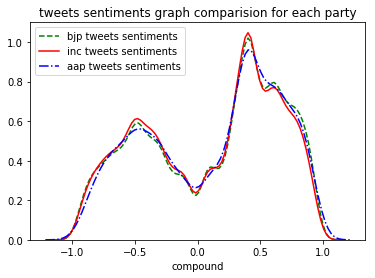

In [8]:
bjp_sentiment_df_nz = bjp_sentiment_df[bjp_sentiment_df['compound'] != 0]
inc_sentiment_df_nz = inc_sentiment_df[inc_sentiment_df['compound'] != 0]
aap_sentiment_df_nz = aap_sentiment_df[aap_sentiment_df['compound'] != 0]

#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

ax1 = sns.distplot(bjp_sentiment_df_nz['compound'], bins=45, hist = False, label = 'bjp tweets sentiments', color = 'green', kde_kws={'linestyle':'--'})
ax2 = sns.distplot(inc_sentiment_df_nz['compound'], bins=45, hist = False, label = 'inc tweets sentiments', color = 'red', kde_kws={'linestyle':'-'})
ax3 = sns.distplot(aap_sentiment_df_nz['compound'], bins=45, hist = False, label = 'aap tweets sentiments', color = 'blue', kde_kws={'linestyle':'-.'})

plt.legend()
plt.title('tweets sentiments graph comparision for each party')
plt.show()

## we should create a graph to show the count distribution on each party tweets

In [6]:
bold_start = "\033[1m"
bold_end = "\033[0;0m"

#Q: which date has maximum number of tweets for which specific party
# below is for bjp party
bjpDF.loc[:,'date'] = bjpDF.loc[:,'timestamp'].dt.date
bjp_date = bjpDF.groupby('date', as_index=False).agg({"text":"count"}).rename(columns={'text':'Total_bjp_tweets_per_day'}).sort_values(by='Total_bjp_tweets_per_day',ascending=False)
print(bold_start, 'Date at which maximum number of tweets happened for BJP party:', bold_end, bjp_date.iloc[0,:][0], 'and the count is:', bjp_date.iloc[0,:][1])

# below is for congress party
incDF.loc[:,'date'] = incDF.loc[:,'timestamp'].dt.date
inc_date = incDF.groupby('date', as_index=False).agg({"text":"count"}).rename(columns={'text':'Total_congress_tweets_per_day'}).sort_values(by='Total_congress_tweets_per_day',ascending=False)
print(bold_start, 'Date at which maximum number of tweets happened for congress party:', bold_end, inc_date.iloc[0,:][0], 'and the count is:', inc_date.iloc[0,:][1])

#Q: which date has maximum number of tweets for which specific party
aapDF.loc[:,'date'] = aapDF.loc[:,'timestamp'].dt.date
aap_date = aapDF.groupby('date', as_index=False).agg({"text":"count"}).rename(columns={'text':'Total_aap_tweets_per_day'}).sort_values(by='Total_aap_tweets_per_day',ascending=False)
print(bold_start, 'Date at which maximum number of tweets happened for aad admi party:', bold_end, aap_date.iloc[0,:][0], 'and the count is:', aap_date.iloc[0,:][1])


#Q: which tweet has highest likes
highest_likes = cleanDF.sort_values(by='likes', ascending=False).head(1).loc[:,['likes','text','user']]
print(bold_start,'Tweet with highest likes is:',bold_end, highest_likes.loc[:,'text'].to_string(index=False),bold_start,'posted by user:',bold_end,highest_likes.loc[:,'user'].to_string(index=False),'with total of like:',bold_start,highest_likes.loc[:,'likes'].to_string(index=False),bold_end,)

#Q: which tweet has highest replies
highest_likes = cleanDF.sort_values(by='replies', ascending=False).head(1).loc[:,['replies','text','user']]
print(bold_start,'Tweet with highest replies is:',bold_end, highest_likes.loc[:,'text'].to_string(index=False),bold_start,'posted by user:',bold_end,highest_likes.loc[:,'user'].to_string(index=False),'with total of replies:',bold_start,highest_likes.loc[:,'replies'].to_string(index=False),bold_end,)

#Q: which tweet has highest retweets
highest_likes = cleanDF.sort_values(by='retweets', ascending=False).head(1).loc[:,['retweets','text','user']]
print(bold_start,'Tweet with highest retweets is:',bold_end, highest_likes.loc[:,'text'].to_string(index=False),bold_start,'posted by user:',bold_end,highest_likes.loc[:,'user'].to_string(index=False),'with total of retweets:',bold_start,highest_likes.loc[:,'retweets'].to_string(index=False),bold_end,)


/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


 Date at which maximum number of tweets happened for BJP party:  2019-05-17 and the count is: 4939


/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


 Date at which maximum number of tweets happened for congress party:  2019-04-02 and the count is: 3870
 Date at which maximum number of tweets happened for aad admi party:  2019-05-10 and the count is: 1127


/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


 Tweet with highest likes is:   filed nomination south delhi seat #loksabhaelections2019 today. need blessing support.  posted by user:   boxervijender with total of like:   23172 
 Tweet with highest replies is:   filed nomination south delhi seat #loksabhaelections2019 today. need blessing support.  posted by user:   boxervijender with total of replies:   4439 
 Tweet with highest retweets is:   #watch actor kangana ranaut voting #loksabhaelections2019 mumbai yesterday, "i feel india gaining independence real sense today. this, servant mughal, british & italian governments. please exercise 'swaraj (independence)' & vote"  posted by user:   ANI with total of retweets:   6280 


# Which party is winning the Election battle on Twitter

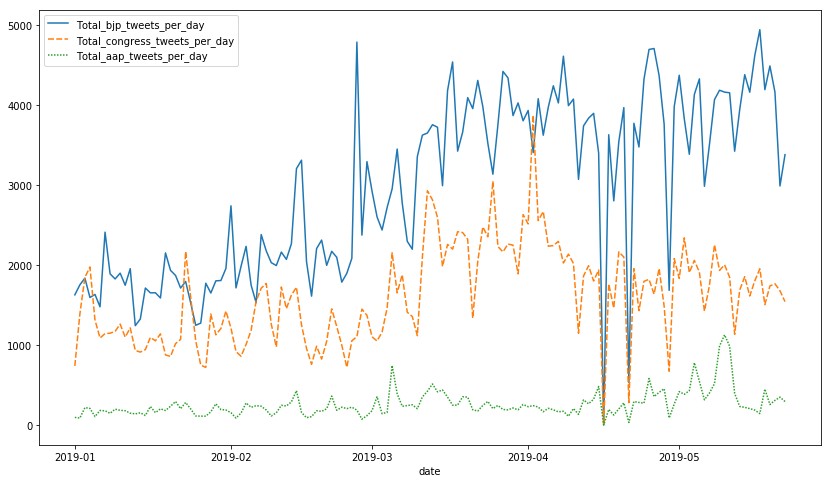

In [28]:
plt.figure(figsize=(14,8))
temp = pd.concat([bjp_date, inc_date, aap_date], axis=1, sort=True)
data = temp.iloc[:,[0,1,3,5]].set_index('date')
ax = sns.lineplot(data=data)

# Below is the word count without tokenization applied

In [ ]:
## Tokenization --> Its the 

In [40]:
# few more data cleaning activity lines
few_additional_stopword = ['…','|', '&','-','u',"'",'_','’','=','.','s','/','।','t',':']
### why I used u, s, and t letters
hindi_stopword_list = STOPS_LIST+Swadesh('hi').words()
final_stopword_list = hindi_stopword_list+few_additional_stopword

In [26]:
# we need to clean hindi stop words to avoid word counts for them
# this was not implemented with data cleaning because I don't want to loose the feel of tweets
# Q: Which word has highest frequency 
# Q: We can calculate the percentage ratio of words as well'''

words_in_tweet = [tweet.split() for tweet in cleanDF.loc[:,'text']]
all_words = list(itertools.chain(*words_in_tweet))

clean_word_list = [word for word in all_words if word not in final_stopword_list]

counts_per_word = collections.Counter(clean_word_list)
#counts_per_word.most_common(25)

wordcounts_without_tokenization = pd.DataFrame(counts_per_word.most_common(25),
                             columns=['words', 'count'])

wordcounts_without_tokenization.head(25)

,words,count
0,#loksabhaelections2019,342144
1,#bjp,172710
2,#congress,148888
3,#narendramodi,91519
4,@narendramodi,52361
5,@bjp4india,38074
6,मोदी,37729
7,pm,35539
8,bjp,33683
9,vote,32192


# Data Visualization

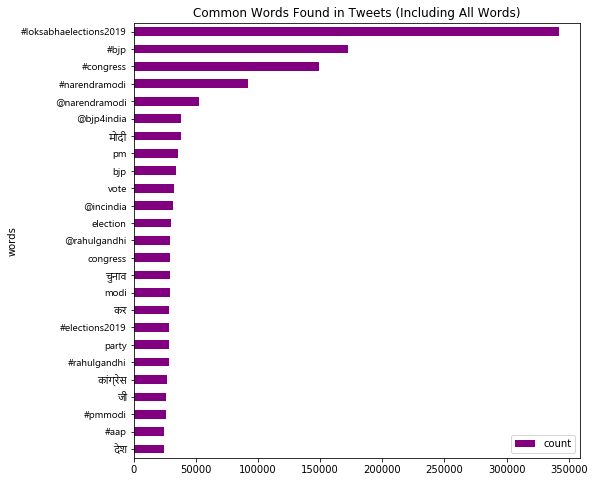

In [27]:
# Data Visualization for above part
fig, ax = plt.subplots(figsize=(8, 8))
hindi_font = FontProperties(fname = 'Nirmala.ttf')
plt.yticks(fontproperties=hindi_font)
# Plot horizontal bar graph
wordcounts_without_tokenization.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Below is the word count with tokenization applied

In [41]:
new_cleanDF = pd.DataFrame(columns=['text'])
new_cleanDF.loc[:,'text'] = cleanDF.loc[:,'text'].apply(lambda x: TextBlob(x).words)
new_cleanDF.loc[:,'text'] = new_cleanDF.loc[:,'text'].apply(lambda x: ' '.join(item for item in x))

tokenizer = TokenizeSentence('hindi') ## http://docs.cltk.org/en/latest/hindi.html
new_cleanDF.loc[:,'text'] = new_cleanDF.loc[:,'text'].apply(lambda x: tokenizer.tokenize(x))
new_cleanDF.loc[:,'text'] = new_cleanDF.loc[:,'text'].apply(lambda x: ' '.join(item for item in x))

words_in_tweet = [tweet.split() for tweet in new_cleanDF.loc[:,'text']]
all_words = list(itertools.chain(*words_in_tweet))

clean_word_list = [word for word in all_words if word not in final_stopword_list]

counts_per_word = collections.Counter(clean_word_list)
#counts_per_word.most_common(25)

wordcounts_with_tokenization = pd.DataFrame(counts_per_word.most_common(15),
                             columns=['words', 'count'])

wordcounts_with_tokenization.head()

,words,count
0,loksabhaelections2019,352367
1,bjp,258078
2,congress,217587
3,narendramodi,153544
4,modi,89611


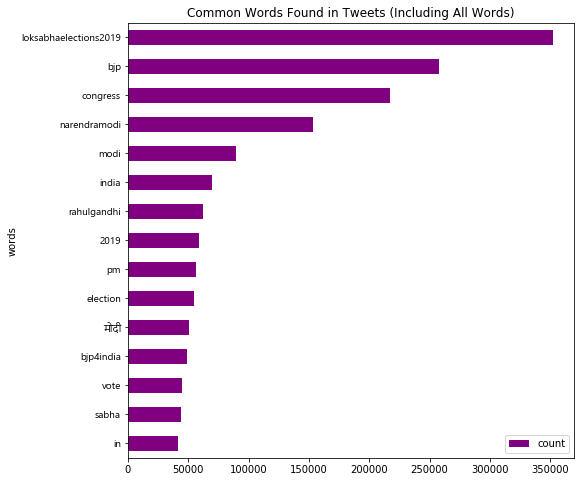

In [32]:
# Data Visualization for above part
fig, ax = plt.subplots(figsize=(8, 8))
hindi_font = FontProperties(fname = 'Nirmala.ttf')
plt.yticks(fontproperties=hindi_font)
# Plot horizontal bar graph
wordcounts_with_tokenization.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Word Cloud

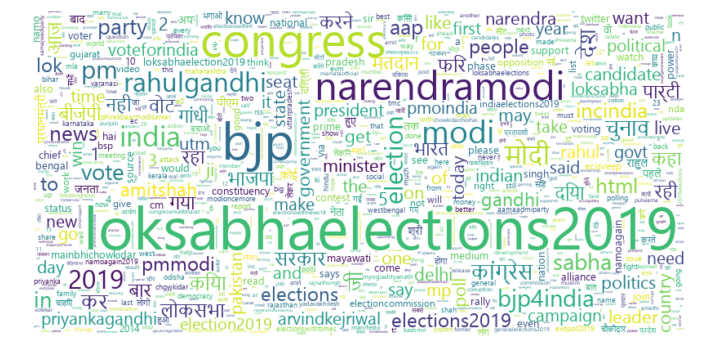

In [46]:
# Word cloud
wc = WordCloud(font_path='Nirmala.ttf', background_color="white", max_words=2000, width=800, height=400)
# generate word cloud from word counter frequency
wc.generate_from_frequencies(counts_per_word)

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment analysis

In [6]:
## Q: Which leader/party had more positive vs negative sentiments?
#get sentiment scores
analyzer = SentimentIntensityAnalyzer()
sentiment_score = cleanDF['text'].apply(lambda x: analyzer.polarity_scores(x))
#put sentiment score into dataframe
sentimentDF = pd.concat([cleanDF, sentiment_score.apply(pd.Series)],1)
sentimentDF.head()


,lang,likes,replies,retweets,text,timestamp,user,neg,neu,pos,compound
0,hi,5,1,3,"कमलनाथ सरकार ने तोड़ी 14 साल पुरानी परंपरा, 1 जनवरी को नहीं हुआ वंदे मातरम का गायन #kamalnath #madhyapradesh #congress #vandematram-pradesh/vade-mataram-not-sing-in-madhya-pradesh-secretariat …",2019-01-01 23:58:04,AmarUjalaNews,0.000,1.000,0.000,0.0000
1,en,0,0,0,ricky martin husband welcome baby girl #aap,2019-01-01 23:51:04,StarMackay,0.000,0.667,0.333,0.4588
2,hi,2,0,2,लोकसभा चुनाव से पहले संगठन मजबूत करने को कांग्रेस छह राज्यों में बनाएगी नए अध्यक्ष #loksabhaelection2019 #congress #rahulgandhi-news/congress-will-make-new-presidents-in-six-states-before-lok-sabha-election-2019 …,2019-01-01 23:49:05,AmarUjalaNews,0.000,1.000,0.000,0.0000
3,en,0,0,1,#aap aam admi mock aadmi party #loksabhaelection2019 #delhi?v=d6lhf3wz0-g …,2019-01-01 23:38:26,naashonomics,0.243,0.522,0.235,-0.0258
4,en,0,0,0,festivalgoers still risking life high #aap,2019-01-01 23:38:05,star1027cairns,0.271,0.471,0.259,-0.0258
6,en,1,0,0,nationwide 72 lakh cr #farmloanwaiver anvail #primeminister #narendramodi #loksabhaelection2019 #modivsmahagathbandhan?v=yd9ckrze7qc …,2019-01-01 23:36:18,naashonomics,0.000,1.000,0.000,0.0000
12,en,0,0,0,technology trend watch 2019 #aap,2019-01-01 23:28:04,hot100darwin,0.000,1.000,0.000,0.0000
13,en,2,0,1,#congress still power override president’s executive order.,2019-01-01 23:28:00,MiFamiliaVota,0.000,1.000,0.000,0.0000
14,en,0,0,0,gathbandhan defeat #pmmodi ? vote find out. #modi2019interview #newyears2019 #happynewyear2019_bihari/status/1080213530266165249 …,2019-01-01 23:27:54,Bewda_Bihari,0.273,0.727,0.000,-0.4588
15,en,0,0,0,nasa probe 'phones' solar system edge #aap,2019-01-01 23:26:04,ClassicHits4MK,0.000,1.000,0.000,0.0000


In [7]:
# this tells us the summary details of dataframe
sentimentDF.describe()

,likes,replies,retweets,neg,neu,pos,compound
count,753725.000000,753725.000000,753725.000000,753725.000000,753725.000000,753725.000000,753725.000000
mean,11.227657,1.084491,3.230079,0.047024,0.878686,0.074290,0.055713
std,113.402332,14.891608,35.207452,0.102586,0.169480,0.127878,0.350889
min,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,-0.998400
25%,0.000000,0.000000,0.000000,0.000000,0.768000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000,0.128000,0.077200
max,23172.000000,4439.000000,6280.000000,0.908000,1.000000,0.967000,0.997000


## We have 753,725 tweets that average 11 likes, 1 replies, and 3 retweets. Looking at the compound score we can see on average tweets are positive, with a mean sentiment of 0.05.

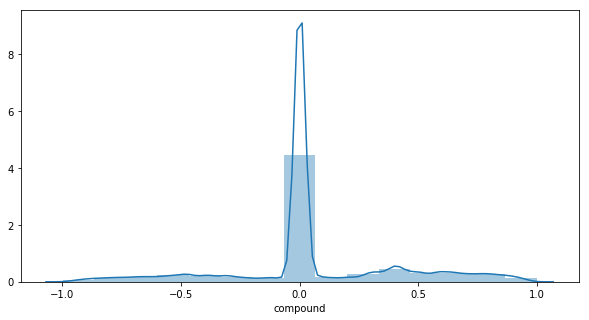

In [9]:
# graphs are implemented based on this article
#https://towardsdatascience.com/sentiment-analysis-of-anthem-game-launch-in-python-16be9e5083d2
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(sentimentDF['compound'], bins=15, ax=ax)
plt.show()

## Its better to exlude these tweets from original dataset for the time being. But it is worth noting that if these were not included the average sentiment would be much higher.

In [12]:
# lets analyze tweets only for few samples
ot = sentimentDF.copy()
ot.sort_values(by='timestamp', inplace=True)
ot.index = pd.to_datetime(ot['timestamp'])

temp1 = ot.sample(frac=.1, random_state=1111)
temp1.sort_index(inplace=True)
temp1['mean'] = temp1['compound'].expanding().mean()
temp1['rolling'] = temp1['compound'].rolling('6h').mean()

/Users/neerajsomani/anaconda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


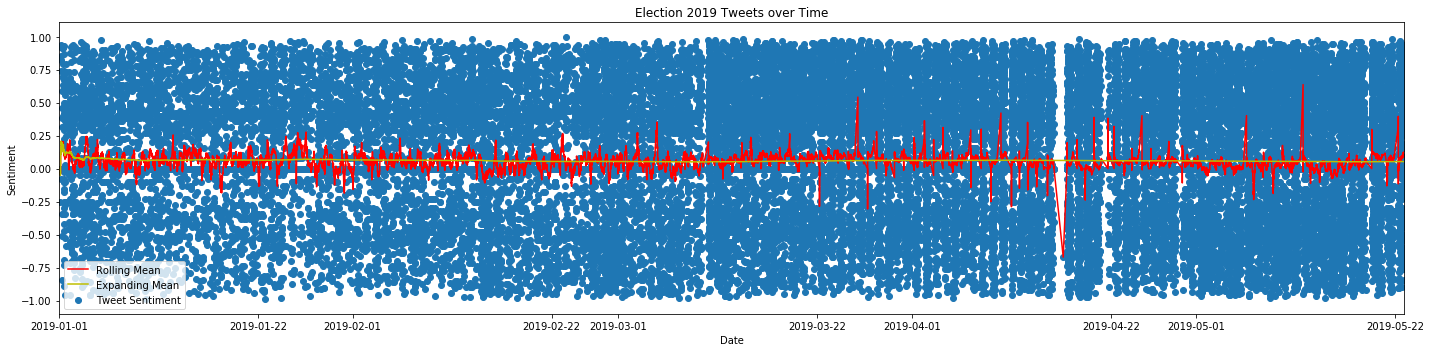

In [13]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(temp1['timestamp'],temp1['compound'], label='Tweet Sentiment')
ax.plot(temp1['timestamp'],temp1['rolling'], color ='r', label='Rolling Mean')
ax.plot(temp1['timestamp'],temp1['mean'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2019,1,1),dt.date(2019,5,23)])
ax.set(title='Election 2019 Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

In [ ]:
1. scrapy twitter 
2. cleaning data
3. analysis / predict
4. matplotlib (graphs)
5. conclusion

In [ ]:
# Things to be improved in future works:
'''
1. Sentiment Analysis for hindi words are not done properly as VADER package doesn't work for hindi language. One way to do this is to translate each hindi tweet into english and then analyze.
2. I took only 10000 tweets per day, in-order to analyze it in more proper way I could get complete tweets for each day
3. There are a lot of loose ends, when it comes to analyze the tweets of Hinglish language mean appling tokenzation and lemmitization
4. There are a lot of fake tweets related to #aap which needs to be cleaned
5. 